# Adversarial Examples in Deep Learning


In [78]:
from adversarial import Adversarial
import matplotlib.pyplot as plt
import shutil
import tempfile
import os
import requests
import caffe
import numpy as np
import pandas as pd
%matplotlib inline

In [79]:
adv = Adversarial()

plt.rcParams['figure.figsize'] = (4, 4)
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

In [80]:
def get_png_image(url):
    fd, path = tempfile.mkstemp()
    tmpfile = os.fdopen(fd, "wb")
    response = requests.get(url, stream=True)
    shutil.copyfileobj(response.raw, tmpfile)
    if 'png' in url:
        !mv {path} {path}.png
    else:
        !convert {path} {path}.png
    path = path + ".png"
    return adv.transformer.preprocess('data', caffe.io.load_image(path))

convert: Premature end of JPEG file `/var/folders/3v/mnpcr9rj7ys1njlwmr8h10mc0000gn/T/tmpKXlqfR' @ warning/jpeg.c/JPEGWarningHandler/352.
convert: Corrupt JPEG data: premature end of data segment `/var/folders/3v/mnpcr9rj7ys1njlwmr8h10mc0000gn/T/tmpKXlqfR' @ warning/jpeg.c/JPEGWarningHandler/352.
label: 388 (giant panda, panda)
certainty: 99.57%


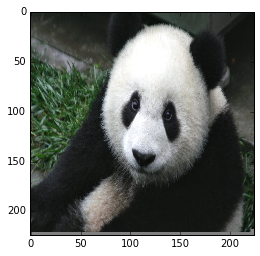

In [81]:
panda_url = 'https://upload.wikimedia.org/wikipedia/commons/c/cd/Panda_Cub_from_Wolong,_Sichuan,_China.JPG'
panda_data = get_png_image(panda_url)
probs = adv.predict(panda_data, n_preds=1)

convert: Premature end of JPEG file `/var/folders/3v/mnpcr9rj7ys1njlwmr8h10mc0000gn/T/tmp1LjjfT' @ warning/jpeg.c/JPEGWarningHandler/352.
convert: Corrupt JPEG data: premature end of data segment `/var/folders/3v/mnpcr9rj7ys1njlwmr8h10mc0000gn/T/tmp1LjjfT' @ warning/jpeg.c/JPEGWarningHandler/352.
label: 623 (letter opener, paper knife)
certainty: 77.63%


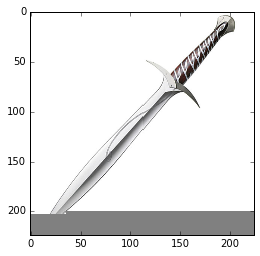

In [82]:
sword_url = 'http://a.tgcdn.net/images/products/zoom/f2bc_sting_the_sword_of_bilbo_baggins.jpg'
sword_data = get_png_image(sword_url)
probs = adv.predict(sword_data, n_preds=1)

convert: Premature end of JPEG file `/var/folders/3v/mnpcr9rj7ys1njlwmr8h10mc0000gn/T/tmpeJNzun' @ warning/jpeg.c/JPEGWarningHandler/352.
convert: Corrupt JPEG data: premature end of data segment `/var/folders/3v/mnpcr9rj7ys1njlwmr8h10mc0000gn/T/tmpeJNzun' @ warning/jpeg.c/JPEGWarningHandler/352.
label: 285 (Egyptian cat), certainty: 34.57%
label: 281 (tabby, tabby cat), certainty: 32.59%
label: 282 (tiger cat), certainty: 15.58%
label: 896 (washbasin, handbasin), certainty: 1.99%
label: 287 (lynx, catamount), certainty: 1.94%
label: 876 (tub, vat), certainty: 1.93%
label: 728 (plastic bag), certainty: 1.78%
label: 700 (paper towel), certainty: 1.44%
label: 435 (bathtub, bathing tub), certainty: 0.93%
label: 434 (bath towel), certainty: 0.86%


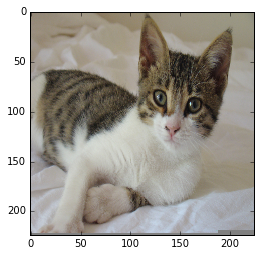

In [83]:
kitten_url = 'https://upload.wikimedia.org/wikipedia/commons/b/b9/CyprusShorthair.jpg'
kitten_data = get_png_image(kitten_url)
probs = adv.predict(kitten_data, n_preds=10)

convert: Premature end of JPEG file `/var/folders/3v/mnpcr9rj7ys1njlwmr8h10mc0000gn/T/tmpsyouv4' @ warning/jpeg.c/JPEGWarningHandler/352.
convert: Corrupt JPEG data: premature end of data segment `/var/folders/3v/mnpcr9rj7ys1njlwmr8h10mc0000gn/T/tmpsyouv4' @ warning/jpeg.c/JPEGWarningHandler/352.
label: 452 (bonnet, poke bonnet), certainty: 50.78%
label: 903 (wig), certainty: 39.52%
label: 808 (sombrero), certainty: 1.72%
label: 552 (feather boa, boa), certainty: 1.54%
label: 749 (quill, quill pen), certainty: 0.89%


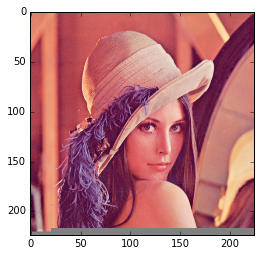

In [84]:
lena_url = 'https://onionesquereality.files.wordpress.com/2008/01/lena512color.jpg'
lena_data = get_png_image(lena_url)
probs = adv.predict(lena_data, n_preds=5)

convert: Premature end of JPEG file `/var/folders/3v/mnpcr9rj7ys1njlwmr8h10mc0000gn/T/tmp2tPK1l' @ warning/jpeg.c/JPEGWarningHandler/352.
convert: Corrupt JPEG data: premature end of data segment `/var/folders/3v/mnpcr9rj7ys1njlwmr8h10mc0000gn/T/tmp2tPK1l' @ warning/jpeg.c/JPEGWarningHandler/352.
label: 263 (Pembroke, Pembroke Welsh corgi)
certainty: 42.77%


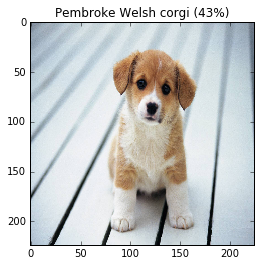

In [85]:
dog_url = 'http://cdn.playbuzz.com/cdn/7820ec56-cd7d-487c-87ba-30ca87219dc4/26084bf6-4235-4f8f-9c2f-b7294ea62c15.jpg'
dog_data = get_png_image(dog_url)
probs = adv.predict(dog_data, n_preds=1)
plt.title('Pembroke Welsh corgi (43%)')

convert: Premature end of JPEG file `/var/folders/3v/mnpcr9rj7ys1njlwmr8h10mc0000gn/T/tmpVEG7er' @ warning/jpeg.c/JPEGWarningHandler/352.
convert: Corrupt JPEG data: premature end of data segment `/var/folders/3v/mnpcr9rj7ys1njlwmr8h10mc0000gn/T/tmpVEG7er' @ warning/jpeg.c/JPEGWarningHandler/352.
label: 793 (shower cap)
certainty: 99.55%


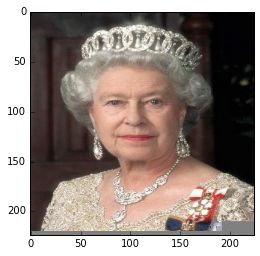

In [86]:
queen_url = 'http://www.webwombat.com.au/careers_ed/education/images/queen-elizabeth-II.jpg'
queen_data = get_png_image(queen_url)
probs = adv.predict(queen_data, n_preds=1)

convert: Premature end of JPEG file `/var/folders/3v/mnpcr9rj7ys1njlwmr8h10mc0000gn/T/tmp3xwPC7' @ warning/jpeg.c/JPEGWarningHandler/352.
convert: Corrupt JPEG data: premature end of data segment `/var/folders/3v/mnpcr9rj7ys1njlwmr8h10mc0000gn/T/tmp3xwPC7' @ warning/jpeg.c/JPEGWarningHandler/352.
label: 716 (picket fence, paling), certainty: 63.82%
label: 912 (worm fence, snake fence), certainty: 36.12%
label: 646 (maze, labyrinth), certainty: 0.01%
label: 753 (radiator), certainty: 0.01%
label: 888 (viaduct), certainty: 0.01%
label: 825 (stone wall), certainty: 0.0%


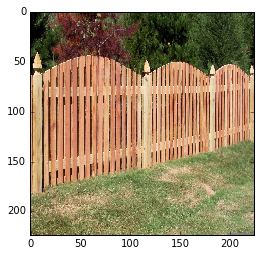

In [87]:
fence_url = 'http://jmarvinhandyman.com/wp-content/uploads/2014/04/fence-mossy-oak-wood-shadowbox_1373304.jpg'
fence_data = get_png_image(fence_url)
probs = adv.predict(fence_data, n_preds=6)

# Fast Gradient Sign

## Step 1: the black screen

label: 885 (velvet), certainty: 27.38%
label: 794 (shower curtain), certainty: 6.4%
label: 911 (wool, woolen), certainty: 6.19%
label: 700 (paper towel), certainty: 4.67%
label: 904 (window screen), certainty: 4.39%


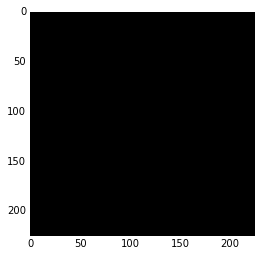

In [88]:
black = np.zeros_like(panda_data)
_ = adv.predict(black, n_preds=5)

## Step 2: calculate the gradient

In [89]:
grad = adv.compute_gradient(black, 700)

In [90]:
grad.shape

(3, 224, 224)

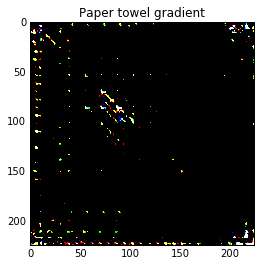

In [33]:
adv.display(grad / np.percentile(grad, 98))
plt.title('Paper towel gradient')

## Step 3: find the direction that makes it most like a paper towel

We want to maximize the amount we're going to change our output probabilities by. Near our image, the probabilities look like

$$ P(x + \text{delta}) =  P(x) + \text{delta} \cdot \text{grad}$$

The intuition behind what we want to do is -- we want to create a `delta` which emphasizes the pixels in the picture that the neural network thinks is important. Let's do it in code now, and hopefully what we're doing will become here.


First, let's pick a random direction and see what $ \text{delta} \cdot \text{grad} $ is

In [34]:
delta_random = np.random.randint(-1, 1, grad.shape)
np.sum(grad * delta_random)

-0.003022479483490062

So that's a pretty small change in probability. Now, let's suppose `grad` was $(-0.01, -0.01, 0.01, 0.02, 0.03)$.

We could make $\text{grad} \cdot \text{delta}$ big by taking $\text{delta} = (-1, -1, 1, 1, 1)$, to get 0.08. Let's try that! In code, that'll be `delta = np.sign(grad)`

In [35]:
delta = np.sign(grad)
np.sum(grad * delta)

0.20192002

Let's see if adding that delta to our image makes a big change in the classification.

## Step 4: Evaluation

label: 885 (velvet), certainty: 58.34%
label: 700 (paper towel), certainty: 15.38%
label: 794 (shower curtain), certainty: 6.82%
label: 911 (wool, woolen), certainty: 6.34%
label: 434 (bath towel), certainty: 2.03%


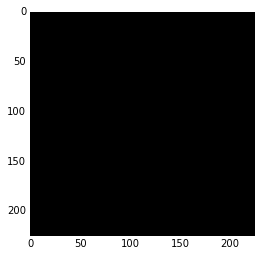

In [36]:
_ = adv.predict((black + 0.9*delta), n_preds=5)

## Step 5: Iterative Fast Gradient Sign with Step Size 0.1

In [37]:
black = np.zeros_like(panda_data)
# maintain a list of outputs at each prediction
prediction_steps = []
for _ in range(9):
    grad = adv.compute_gradient(black, 700) # paper towel
    delta = np.sign(grad)
    black = black + delta * 0.1
    preds = adv.predict(black, display_output=False)
    prediction_steps.append(np.copy(preds))

### See the probabilities change over time

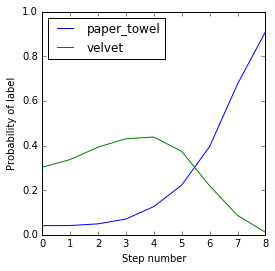

In [38]:
velvet_label = 885
paper_towel_label = 700
df = pd.DataFrame({
    'velvet': [s[0][velvet_label] for s in prediction_steps],
    'paper_towel': [s[0][paper_towel_label] for s in prediction_steps]
    })

df.plot()
plt.xlabel('Step number')
plt.ylabel('Probability of label')

label: 700 (paper towel), certainty: 90.91%
label: 911 (wool, woolen), certainty: 2.34%


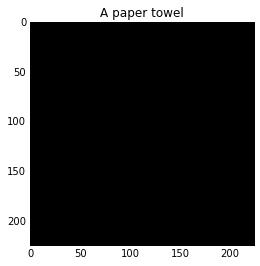

In [39]:
_ = adv.predict(black, n_preds=2)
plt.title('A paper towel')

### The pixel values
And here are the pixel values that make up that image! They all started out at exactly 0, the method has mutated them to be small but powerful in tricking the network to think the image is a paper towel.

In [40]:
black

array([[[ 0.30000001, -0.30000001, -0.30000001, ...,  0.30000001,
          0.30000001,  0.30000001],
        [ 0.5       ,  0.9000001 ,  0.9000001 , ...,  0.9000001 ,
          0.70000005,  0.30000001],
        [ 0.10000002,  0.70000005, -0.5       , ...,  0.9000001 ,
          0.9000001 ,  0.9000001 ],
        ..., 
        [ 0.1       ,  0.1       , -0.30000001, ...,  0.30000001,
          0.70000005,  0.5       ],
        [ 0.30000001, -0.9000001 , -0.29999998, ..., -0.1       ,
          0.1       ,  0.70000005],
        [-0.5       , -0.9000001 , -0.9000001 , ..., -0.5       ,
          0.70000005,  0.9000001 ]],

       [[-0.10000002, -0.10000002, -0.30000001, ...,  0.1       ,
          0.30000001,  0.30000001],
        [-0.30000001,  0.5       , -0.30000001, ...,  0.9000001 ,
          0.5       ,  0.30000001],
        [-0.10000002, -0.30000001, -0.70000005, ...,  0.70000005,
          0.70000005,  0.5       ],
        ..., 
        [ 0.5       ,  0.30000001,  0.10000002, ...,

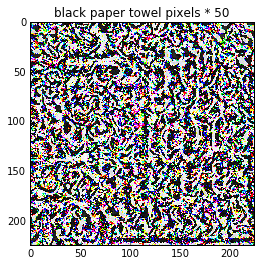

In [41]:
adv.display(black * 50)
plt.title('black paper towel pixels * 50')

# Inverse Fast Gradient Sign: Less Likely method

label: 388 (giant panda, panda), certainty: 99.57%
label: 387 (lesser panda, red panda), certainty: 0.1%
label: 383 (Madagascar cat, ring-tailed lemur), certainty: 0.05%
label: 850 (teddy, teddy bear), certainty: 0.04%
label: 356 (weasel), certainty: 0.03%


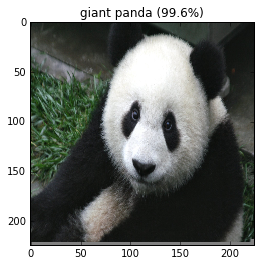

In [42]:
_  = adv.predict(panda_data, n_preds=5)
plt.title("giant panda (99.6%)")

What happens if we make it **less** like a panda? It becomes 40% weasel! And the neat thing is that -- we can do that in a single step, by adding just one image. This is what's meant by 'neural networks are kind of linear'.

label: 356 (weasel), certainty: 25.94%
label: 358 (polecat, fitch), certainty: 21.92%
label: 359 (black-footed ferret, ferret), certainty: 21.89%
label: 279 (Arctic fox, white fox), certainty: 5.29%
label: 357 (mink), certainty: 3.06%
label: 333 (hamster), certainty: 2.14%


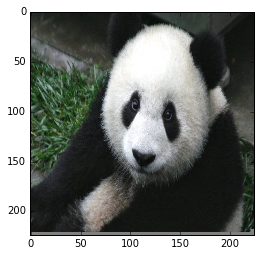

In [43]:
adv.make_less_like(panda_data,388);

## Making the panda a vulture

In [44]:
vulture_label=23
vulture_panda, steps = adv.trick(panda_data, vulture_label, n_steps=10)

[[[  3.43570065e-07  -8.14888210e-08  -7.93116385e-07 ...,  -5.67602143e-09
    -4.09951610e-07  -9.37099628e-07]
  [ -5.65526292e-08  -5.43188321e-07  -9.47098329e-07 ...,   1.77604579e-06
     1.23827064e-07  -1.05721460e-06]
  [  1.28028788e-07  -3.66588068e-07  -6.18699332e-08 ...,   2.05395963e-06
    -1.70549436e-06  -8.32790477e-07]
  ..., 
  [  6.53732286e-07   1.55921555e-06   1.11640759e-06 ...,   8.63859896e-07
     1.09818745e-06   3.11347151e-07]
  [ -1.16440015e-06   7.14341013e-08   8.03382250e-07 ...,   8.27344252e-07
     1.02224658e-06   1.16995591e-06]
  [ -2.64320050e-08   2.57455099e-07   6.46652609e-07 ...,   1.34052485e-07
     4.33510280e-07   8.11832876e-07]]

 [[  4.49293481e-07   6.37196109e-08  -6.17343744e-07 ...,   2.73310235e-07
     2.67172425e-07  -7.33254524e-07]
  [ -2.57387455e-07  -5.47689410e-07  -1.15627756e-06 ...,   1.96517158e-06
     5.14907356e-07  -1.18709988e-06]
  [  3.37346862e-08  -6.10733366e-07  -4.98087957e-07 ...,   2.26772909e-06
  

label: 023 (vulture), certainty: 98.95%
label: 009 (ostrich, Struthio camelus), certainty: 0.23%
label: 368 (gibbon, Hylobates lar), certainty: 0.16%
label: 146 (albatross, mollymawk), certainty: 0.12%
label: 383 (Madagascar cat, ring-tailed lemur), certainty: 0.08%
label: 134 (crane), certainty: 0.06%


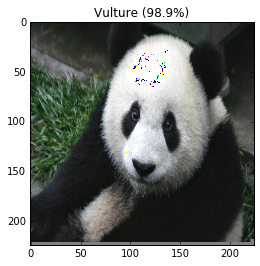

In [45]:
_ = adv.predict(vulture_panda)
plt.title("Vulture (98.9%)")

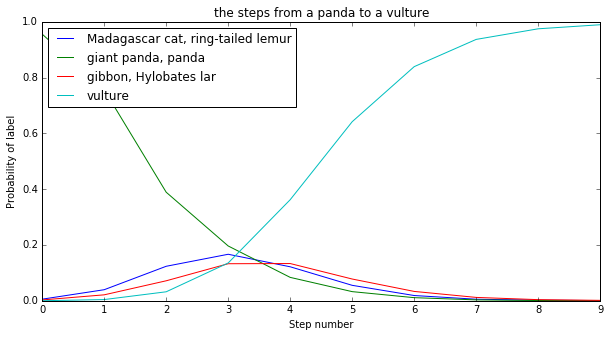

In [46]:
adv.plot_steps(steps, [23, 388, 368, 383], figsize=(10, 5))
plt.title("the steps from a panda to a vulture")

## The garbage can

In [47]:
_ = predict(garbage_data, n_preds=3)
plt.title("Garbage can (40%)")

NameError: name 'predict' is not defined

In [ ]:
grad, image = make_less_like(garbage_data, 412)
_ = predict(image, n_preds=4)
plt.title("Water jug (25%), cocktail shaker (15%)")

And here's the gradient:

In [ ]:
display(grad / np.percentile(grad, 98))
plt.title("garbage can gradient")

We can also make the network **more** sure it's a garbage can:

In [ ]:
_ = predict(garbage_data + 0.75 * np.sign(grad), n_preds=2)

### Kitten

In [ ]:
_ = predict(kitten_data)
plt.title("Egyptian cat (35%)")

Now, we make each of the top 3 predictions less likely!

In [ ]:
grad, image = make_less_like(kitten_data, 285)
grad, image2 = make_less_like(image, 281)
grad, image3 = make_less_like(image, 282)

In [ ]:
_ = predict(image3)
plt.title("Bath towel (50%), paper towel (11%)")

### Dog

This dog, on the other hand, is highly resistant to being classified as something other than a dog. When we subtract away the corgi and beagle it just insists "maybe a golden retriever then!" I spent some time trying to convince it that the dog was a tennis ball but it remained, well, a dog.

good job, network (so far!)

In [ ]:
_ = predict(dog_data)
plt.title("Corgi (42%)")

In [ ]:
grad, image = make_less_like(dog_data, 263)
grad, image2 = make_less_like(image, 162)
grad, image3 = make_less_like(image2, 264)
grad, image4 = make_less_like(image2, 167)

In [ ]:
_ = predict(image4)

### 

# more gradient examples

In [ ]:
grad = compute_gradient(panda_data, 388)
display(grad / np.percentile(grad, 98))
plt.title('Panda gradient')
print np.sum(np.abs(grad))

In [ ]:
_ = predict(panda_data - 0.7 * np.sign(grad))

In [ ]:
_ = predict(panda_data + 0 * np.sign(grad))

In [66]:
import numpy as np
import json

from keras.utils.data_utils import get_file
from keras import backend as K

CLASS_INDEX = None
CLASS_INDEX_PATH = 'https://s3.amazonaws.com/deep-learning-models/image-models/imagenet_class_index.json'


def preprocess_input(x, dim_ordering='default'):
    if dim_ordering == 'default':
        dim_ordering = K.image_dim_ordering()
    assert dim_ordering in {'tf', 'th'}

    if dim_ordering == 'th':
        x[:, 0, :, :] -= 103.939
        x[:, 1, :, :] -= 116.779
        x[:, 2, :, :] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, ::-1, :, :]
    else:
        x[:, :, :, 0] -= 103.939
        x[:, :, :, 1] -= 116.779
        x[:, :, :, 2] -= 123.68
        # 'RGB'->'BGR'
        x = x[:, :, :, ::-1]
    return x


def decode_predictions(preds, top=5):
    global CLASS_INDEX
    if len(preds.shape) != 2 or preds.shape[1] != 1000:
        raise ValueError('`decode_predictions` expects '
                         'a batch of predictions '
                         '(i.e. a 2D array of shape (samples, 1000)). '
                         'Found array with shape: ' + str(preds.shape))
    if CLASS_INDEX is None:
        fpath = get_file('imagenet_class_index.json',
                         CLASS_INDEX_PATH,
                         cache_subdir='models')
        CLASS_INDEX = json.load(open(fpath))
    results = []
    for pred in preds:
        top_indices = pred.argsort()[-top:][::-1]
        result = [tuple(CLASS_INDEX[str(i)]) + (pred[i],) for i in top_indices]
        results.append(result)
    return results

In [74]:
from keras.preprocessing import image as image_utils
import numpy as np
import argparse
import cv2

In [70]:
keras.applications.vgg16.VGG16(include_top=True, weights='imagenet')

553459712/553467096 [============================>.] - ETA: 0s

In [75]:
image = image_utils.load_img("panda.JPG", target_size=(224, 224))
image = image_utils.img_to_array(image)

In [77]:
image.shape

(224, 224, 3)